In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mb

In [76]:
# Loading the csv file using pandas

df=pd.read_csv('Enterprise_GPT_Product_Usage_Dataset.csv')     

In [77]:
# Showing top 5 rows of the dataset

df.head()     

,user_id,session_id,timestamp,interaction_type,query_length,response_time,user_rating,error_occurred,industry,location,subscription_level
0,1,153,2/1/2024 17:51,feedback,90,2.228193,1,False,education,"North Laurafort, Djibouti",premium
1,2,153,5/11/2024 3:48,feedback,90,2.902168,3,True,healthcare,"West Sarah, Belgium",enterprise
2,3,103,5/6/2024 11:17,error,27,2.212646,1,False,finance,"Jonathonstad, Costa Rica",premium
3,4,147,8/8/2024 16:32,error,33,1.090335,2,True,education,"Hensonview, Montserrat",enterprise
4,5,148,7/4/2024 14:45,query,89,2.744271,4,False,finance,"Salazarport, Indonesia",enterprise


In [78]:
# Checking number of rows and columns

df.shape           

(1000, 11)

In [79]:
 # Showing info about the dataset

df.info()                                                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1000 non-null   int64  
 1   session_id          1000 non-null   int64  
 2   timestamp           1000 non-null   object 
 3   interaction_type    1000 non-null   object 
 4   query_length        1000 non-null   int64  
 5   response_time       1000 non-null   float64
 6   user_rating         1000 non-null   int64  
 7   error_occurred      1000 non-null   bool   
 8   industry            1000 non-null   object 
 9   location            1000 non-null   object 
 10  subscription_level  1000 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 79.2+ KB


In [80]:
# Converted Datatype of 'timestamp' column to Date_Time

df['timestamp']=pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1000 non-null   int64         
 1   session_id          1000 non-null   int64         
 2   timestamp           1000 non-null   datetime64[ns]
 3   interaction_type    1000 non-null   object        
 4   query_length        1000 non-null   int64         
 5   response_time       1000 non-null   float64       
 6   user_rating         1000 non-null   int64         
 7   error_occurred      1000 non-null   bool          
 8   industry            1000 non-null   object        
 9   location            1000 non-null   object        
 10  subscription_level  1000 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 79.2+ KB


In [81]:
# Key Statistics

df.describe()                                                                        

,user_id,session_id,timestamp,query_length,response_time,user_rating
count,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.000000
mean,500.500000,149.62700,2024-05-08 15:57:26.159999744,54.937000,2.004946,3.025000
min,1.000000,100.00000,2024-01-01 04:05:00,10.000000,1.002482,1.000000
25%,250.750000,125.00000,2024-03-01 04:01:15,33.000000,1.486286,2.000000
50%,500.500000,150.00000,2024-05-09 02:01:00,55.000000,2.008495,3.000000
75%,750.250000,175.00000,2024-07-15 10:14:15,77.000000,2.519914,4.000000
max,1000.000000,199.00000,2024-09-13 03:20:00,99.000000,2.999848,5.000000
std,288.819436,28.96444,NaN,25.779053,0.586859,1.398689


In [82]:
# Average Length of Query

print('Average Length of Query:',round(df['query_length'].mean(),0),'Characters' )     

Average Length of Query: 55.0 Characters


In [83]:
# Average response_time

print('Average response_time:',round(df['response_time'].mean(),0),'Seconds'   ) 

Average response_time: 2.0 Seconds


In [84]:
df.isnull().sum()      # Checking NULL Values

user_id               0
session_id            0
timestamp             0
interaction_type      0
query_length          0
response_time         0
user_rating           0
error_occurred        0
industry              0
location              0
subscription_level    0
dtype: int64

In [85]:
df.nunique()

user_id               1000
session_id             100
timestamp              998
interaction_type         3
query_length            90
response_time         1000
user_rating              5
error_occurred           2
industry                 3
location               999
subscription_level       3
dtype: int64

In [86]:
c= df['timestamp'].value_counts()
duplicate=c[c>1]
duplicate

timestamp
2024-09-07 21:27:00    2
2024-08-21 19:46:00    2
Name: count, dtype: int64

In [87]:
filtered=df.loc[df['timestamp']=='2024-09-07 21:27:00']
filtered

,user_id,session_id,timestamp,interaction_type,query_length,response_time,user_rating,error_occurred,industry,location,subscription_level
224,225,112,2024-09-07 21:27:00,query,41,2.746938,3,True,education,"Port James, Croatia",premium
974,975,140,2024-09-07 21:27:00,feedback,92,1.773346,5,False,finance,"Patriciamouth, Philippines",free


In [88]:
# Seperating Numerical and Categorical Values

Categorical=[]
Numerical=[]

for x in df:
    if df[x].nunique() > 10:
        Numerical.append(x)
    else:
        Categorical.append(x)

Numerical,Categorical
        

(['user_id',
  'session_id',
  'timestamp',
  'query_length',
  'response_time',
  'location'],
 ['interaction_type',
  'user_rating',
  'error_occurred',
  'industry',
  'subscription_level'])

<Axes: >

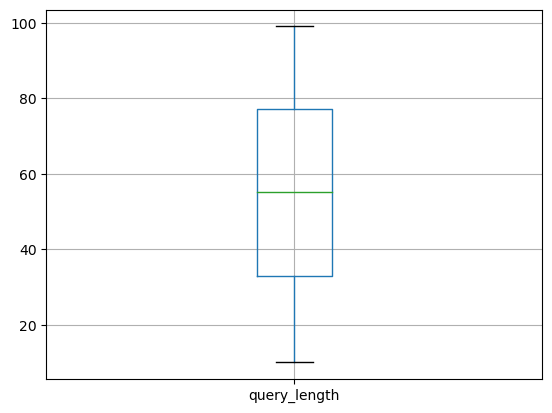

In [89]:
# Looking for outliers in Query_Length

df.boxplot(column=['query_length'])                          

<Axes: >

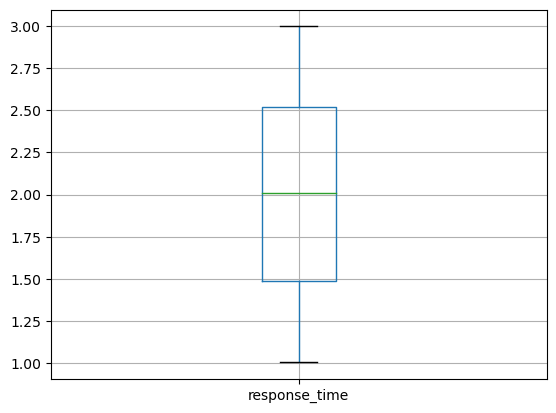

In [90]:
# Looking for outliers in response_time

df.boxplot(column=['response_time'])

# Exploratory Data Analysis (EDA) Summary:

In [ ]:

1) Data Loading:
Loaded the dataset using pandas and displayed the first few rows for an initial view of the structure.

2) Basic Dataset Information:
Checked the shape of the dataset (number of rows and columns) and reviewed data types using info() to understand the dataset's structure.
Converted the timestamp column to datetime format for easier manipulation of date-related values.

3) Descriptive Statistics:
Generated summary statistics using describe() to examine key numerical metrics (mean, min, max, etc.).

4) Calculated specific metrics such as:
Average Query Length: Rounded to the nearest character.
Average Response Time: Rounded to the nearest second.

5) Handling Missing Values:
Checked for missing values using isnull().sum() and verified the data’s completeness.

6) Uniqueness Check:
Used nunique() to identify unique values in each column, helping to detect potential duplicates.

7) Duplicate Detection:
Identified duplicate timestamps by counting occurrences with value_counts(), and filtered the dataset to inspect specific duplicate records.

8) Categorical vs. Numerical Columns:
Segregated columns into categorical and numerical groups based on the number of unique values.

9) Outlier Detection:
Used box plots to visualize outliers in query_length and response_time, identifying any anomalies in these columns.